# Problem Statement:
The lending company seeks to leverage EDA techniques to identify patterns and variables strongly indicative of loan default. This involves understanding the relationships between consumer attributes, loan attributes, and the likelihood of payment - difficulties. The objective is to develop insights that facilitate informed decision-making, such as approving or denying -loans, adjusting loan amounts, or setting appropriate interest rates, to mitigate financial risks and ensure fair treatment of applicants.

# Business Understanding:
The lending company specializes in offering various loans to urban customers but faces challenges in assessing loan applications to prevent defaults while ensuring deserving applicants aren't rejected. The company aims to use EDA to understand how consumer attributes and loan attributes influence the tendency to default. By identifying patterns indicating difficulty in paying instalments, the company can take actions such as denying loans, reducing loan amounts, or lending at higher interest rates to risky applicants. Ultimately, the goal is to minimize financial risks, optimize loan approval processes, and ensure fair treatment of applicants.

In [123]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
import warnings
warnings.filterwarnings("ignore")

In [125]:
# Reading the "application_data" file

data=pd.read_csv("application_data.csv")


In [126]:
# pd.set_option('display.max_columns', None) ensures that all columns will be displayed without truncating

pd.set_option('display.max_columns', None) 

In [127]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Columns Description

- SK_ID_CURR: ID of the loan in the sample.
- TARGET: Target variable indicating payment difficulties.
- NAME_CONTRACT_TYPE: Identification if loan is cash or revolving.
- CODE_GENDER: Gender of the client.
- FLAG_OWN_CAR: Flag if the client owns a car.
- FLAG_OWN_REALTY: Flag if client owns a house or flat.
- CNT_CHILDREN: Number of children the client has.
-  AMT_INCOME_TOTAL: Income of the client.
- AMT_CREDIT: Credit amount of the loan.
- AMT_ANNUITY: Loan annuity.
- AMT_GOODS_PRICE: Price of the goods for which the loan is given.
- NAME_TYPE_SUITE: Who was accompanying the client when applying for the loan.
- NAME_INCOME_TYPE: Client's income type.
- NAME_EDUCATION_TYPE: Level of highest education the client achieved.
- NAME_FAMILY_STATUS: Family status of the client.
- NAME_HOUSING_TYPE: Housing situation of the client.
- REGION_POPULATION_RELATIVE: Normalized population of the region where client lives.
- DAYS_BIRTH: Client's age in days at the time of application.
- DAYS_EMPLOYED: Number of days before the application the person started current employment.
- DAYS_REGISTRATION: Number of days before the application the client changed registration.
- DAYS_ID_PUBLISH: Number of days before the application the client changed the identity document.
- OWN_CAR_AGE: Age of client's car.
- FLAG_MOBIL: Flag if client provided a mobile phone.
- FLAG_EMP_PHONE: Flag if client provided a work phone.
- FLAG_WORK_PHONE: Flag if client provided a home phone.
- FLAG_CONT_MOBILE: Flag if mobile phone was reachable.
- FLAG_PHONE: Flag if client provided a home phone.
- FLAG_EMAIL: Flag if client provided an email.
- OCCUPATION_TYPE: Client's occupation.
- CNT_FAM_MEMBERS: Number of family members the client has.
- REGION_RATING_CLIENT: Company's rating of the region where client lives.
- REGION_RATING_CLIENT_W_CITY: Company's rating of the region where client lives with city consideration.
- WEEKDAY_APPR_PROCESS_START: Day of the week client applied for the loan.
- HOUR_APPR_PROCESS_START: Hour client applied for the loan.
- REG_REGION_NOT_LIVE_REGION: Flag if client's permanent address does not match contact address at region level.
- REG_REGION_NOT_WORK_REGION: Flag if client's permanent address does not match work address at region level.
- LIVE_REGION_NOT_WORK_REGION: Flag if client's contact address does not match work address at region level.
- REG_CITY_NOT_LIVE_CITY: Flag if client's permanent address does not match contact address at city level.
- REG_CITY_NOT_WORK_CITY: Flag if client's permanent address does not match work address at city level.
- LIVE_CITY_NOT_WORK_CITY: Flag if client's contact address does not match work address at city level.
- ORGANIZATION_TYPE: Type of organization where client works.
- EXT_SOURCE_1: Normalized score from external data source.
- EXT_SOURCE_2: Normalized score from external data source.
- EXT_SOURCE_3: Normalized score from external data source.

In [128]:
# Reading the "previous_application" file

previous_data=pd.read_csv("previous_application.csv")
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
#checking shape i.e Rows,columns present in "application_data" data

data.shape

(307511, 122)

In [130]:
# checking shape i.e Rows,columns present in "previous_application" data

previous_data.shape

(1670214, 37)

# Data Cleaning in "application_data" dataset

In [131]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

In [132]:
# checking the null values present in "application_data" dataset

data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [133]:
# to check the percentage of null values

missing_percentage=data.isnull().sum()/len(data)*100
missing_percentage

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [134]:
# I decided that my cutoff should be 30%
# Therefore, Dropping the features which has more that 30% null vales 

In [135]:
columns_to_be_dropped=missing_percentage[missing_percentage > 30].index
columns_to_be_dropped

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLI

In [136]:
data.drop(columns=columns_to_be_dropped,inplace=True)

In [137]:
len(data.columns)                    # we left with 72 columns only,earlier it was 122.So,50 was dropped from the DataFrame

72

In [138]:
# cross veryfying the data

data.isnull().sum()/len(data)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [139]:
data=data[~(data["CNT_FAM_MEMBERS"].isnull())]
data=data[~(data["DAYS_LAST_PHONE_CHANGE"].isnull())]

# Data Cleaning in "previous_application" dataset

In [140]:
missing_percentage=previous_data.isnull().sum()/len(previous_data)*100
missing_percentage

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [141]:
columns_to_be_dropped=missing_percentage[missing_percentage>20].index
columns_to_be_dropped

Index(['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [142]:
previous_data.drop(columns=columns_to_be_dropped,inplace=True)

In [143]:
len(previous_data.columns)   # so we left with only 23 columns

23

In [144]:
# cross veryfying the data

previous_data.isnull().sum()/len(data)*100

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000325
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
NAME_YIELD_GROUP               0.000000
PRODUCT_COMBINATION            0.112517
dtype: float64

In [145]:
# As very few null values i.e only 0.11% null values is there in "PRODUCT_COMBINATION" column
# So its better to drop the rows as it wont affect our analysis much

previous_data=previous_data[~(previous_data["PRODUCT_COMBINATION"].isnull())]

###### "previous_application" dataset to be ready to analyse and no further treatment is required

### Imputing/Removing Missing values in "application_data" dataset

In [146]:
data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  276
NAME_TYPE_SUITE                 1290
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

##### "AMT_ANNUITY"

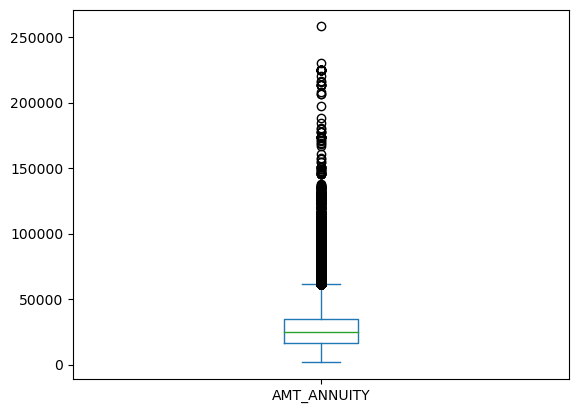

In [147]:
data["AMT_ANNUITY"].plot.box()
plt.show()

In [148]:
# As clearly visible there is oulier present,so mean is not a good option to impute with as it is most affected by Outliers
# Therefore,We will impute null values with its median value as it is less affected by Outliers

data["AMT_ANNUITY"]=data["AMT_ANNUITY"].fillna(data["AMT_ANNUITY"].median())

##### "AMT_GOODS_PRICE" 

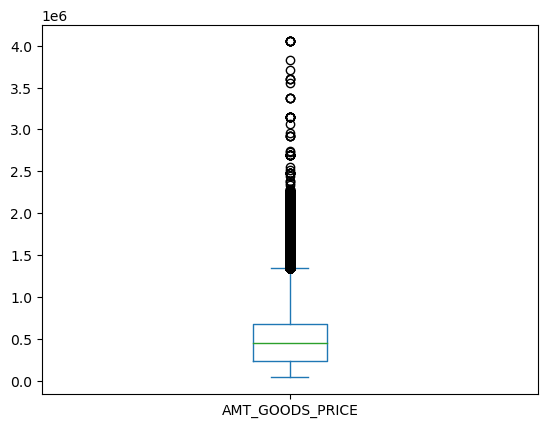

In [149]:
data["AMT_GOODS_PRICE"].plot.box()
plt.show()

In [150]:
# Due to presence of Outlies we go with median again

In [151]:
data["AMT_GOODS_PRICE"].median()

450000.0

In [152]:
data["AMT_GOODS_PRICE"]=data["AMT_GOODS_PRICE"].fillna(data["AMT_GOODS_PRICE"].median())

#### "NAME_TYPE_SUITE"

In [153]:
data["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248525
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [154]:
# As its a categorial variable so best way is to impute with mode

In [155]:
data["NAME_TYPE_SUITE"]=data["NAME_TYPE_SUITE"].fillna(data["NAME_TYPE_SUITE"].mode()[0])

#### "EXT_SOURCE_2"

In [156]:
data["EXT_SOURCE_2"]=data["EXT_SOURCE_2"].fillna(data["EXT_SOURCE_2"].mean())

#### "EXT_SOURCE_3"

In [157]:
data["EXT_SOURCE_3"]=data["EXT_SOURCE_3"].fillna(data["EXT_SOURCE_3"].mean())

##### "OBS_30_CNT_SOCIAL_CIRCLE"

In [158]:
data["OBS_30_CNT_SOCIAL_CIRCLE"]=data["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(data["OBS_30_CNT_SOCIAL_CIRCLE"].mode()[0])

##### "DEF_30_CNT_SOCIAL_CIRCLE"

In [159]:
data["DEF_30_CNT_SOCIAL_CIRCLE"]=data["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(data["DEF_30_CNT_SOCIAL_CIRCLE"].mode()[0])

##### "OBS_60_CNT_SOCIAL_CIRCLE"

In [160]:
data["OBS_60_CNT_SOCIAL_CIRCLE"]=data["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(data["OBS_60_CNT_SOCIAL_CIRCLE"].mode()[0])

#### "DEF_60_CNT_SOCIAL_CIRCLE"

In [161]:
data["DEF_60_CNT_SOCIAL_CIRCLE"]=data["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(data["DEF_60_CNT_SOCIAL_CIRCLE"].mode()[0])

##### "AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK",
##### "AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"

In [162]:
# Filling all null values of these columns with 0 as most of the values are 0 in these columns

data["AMT_REQ_CREDIT_BUREAU_HOUR"]=data["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0)
data["AMT_REQ_CREDIT_BUREAU_DAY"]=data["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0)
data["AMT_REQ_CREDIT_BUREAU_WEEK"]=data["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0)
data["AMT_REQ_CREDIT_BUREAU_MON"]=data["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0)
data["AMT_REQ_CREDIT_BUREAU_QRT"]=data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0)
data["AMT_REQ_CREDIT_BUREAU_YEAR"]=data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0)

In [163]:
# cross veryfying the data

data.isnull().sum()/len(data)*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT

Now the "application_data" dataset is clean and we can proceed

## Checking/Correction of Datatype

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307508 non-null  int64  
 1   TARGET                       307508 non-null  int64  
 2   NAME_CONTRACT_TYPE           307508 non-null  object 
 3   CODE_GENDER                  307508 non-null  object 
 4   FLAG_OWN_CAR                 307508 non-null  object 
 5   FLAG_OWN_REALTY              307508 non-null  object 
 6   CNT_CHILDREN                 307508 non-null  int64  
 7   AMT_INCOME_TOTAL             307508 non-null  float64
 8   AMT_CREDIT                   307508 non-null  float64
 9   AMT_ANNUITY                  307508 non-null  float64
 10  AMT_GOODS_PRICE              307508 non-null  float64
 11  NAME_TYPE_SUITE              307508 non-null  object 
 12  NAME_INCOME_TYPE             307508 non-null  object 
 13 

In [166]:
data["DAYS_REGISTRATION"]=data["DAYS_REGISTRATION"].astype(int,errors="ignore")
data["CNT_FAM_MEMBERS"]=data["CNT_FAM_MEMBERS"].astype(int,errors="ignore")
data["AMT_REQ_CREDIT_BUREAU_HOUR"]=data["AMT_REQ_CREDIT_BUREAU_HOUR"].astype(int,errors="ignore")
data["AMT_REQ_CREDIT_BUREAU_DAY"]=data["AMT_REQ_CREDIT_BUREAU_DAY"].astype(int,errors="ignore")
data["AMT_REQ_CREDIT_BUREAU_WEEK"]=data["AMT_REQ_CREDIT_BUREAU_WEEK"].astype(int,errors="ignore")
data["AMT_REQ_CREDIT_BUREAU_MON"]=data["AMT_REQ_CREDIT_BUREAU_MON"].astype(int,errors="ignore")
data["AMT_REQ_CREDIT_BUREAU_QRT"]=data["AMT_REQ_CREDIT_BUREAU_QRT"].astype(int,errors="ignore")
data["AMT_REQ_CREDIT_BUREAU_YEAR"]=data["AMT_REQ_CREDIT_BUREAU_YEAR"].astype(int,errors="ignore")
data["OBS_30_CNT_SOCIAL_CIRCLE"]=data["OBS_30_CNT_SOCIAL_CIRCLE"].astype(int,errors="ignore")
data["DEF_30_CNT_SOCIAL_CIRCLE"]=data["DEF_30_CNT_SOCIAL_CIRCLE"].astype(int,errors="ignore")
data["OBS_60_CNT_SOCIAL_CIRCLE"]=data["OBS_60_CNT_SOCIAL_CIRCLE"].astype(int,errors="ignore")
data["DEF_60_CNT_SOCIAL_CIRCLE"]=data["DEF_60_CNT_SOCIAL_CIRCLE"].astype(int,errors="ignore")
data["DAYS_LAST_PHONE_CHANGE"]=data["DAYS_LAST_PHONE_CHANGE"].astype(int,errors="ignore")

In [167]:
# Removing Unwanted Columns from the application dataset as is no use in analysis

In [168]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510852,1,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,0,1,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510852,2,0,2,0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510852,0,0,0,0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [169]:
unwanted=["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","REGION_RATING_CLIENT",             
          "REGION_RATING_CLIENT_W_CITY","DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4",                  
          "FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10", 
          "FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16",                 
          "FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]                

In [170]:
data.drop(columns=unwanted,inplace=True)

In [171]:
data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int32
DAYS_ID_PUBLISH                  int64
CNT_FAM_MEMBERS                  int32
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGIO

# Fixing Invalid Values

#### "CODE_GENDER" column

In [172]:
data["CODE_GENDER"].value_counts()

F      202447
M      105057
XNA         4
Name: CODE_GENDER, dtype: int64

In [173]:
# Replacing "XNA" Values with "F" as majority is Females

data["CODE_GENDER"]=data["CODE_GENDER"].apply(lambda x:x.replace("XNA","F"))

#### "ORGANIZATION_TYPE" column

In [174]:
data["ORGANIZATION_TYPE"].value_counts()

# here 55,374 values of XNA is present

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3491
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [175]:
# to check it in percentage form using Normalization

data["ORGANIZATION_TYPE"].value_counts(normalize=True)


Business Entity Type 3    0.221106
XNA                       0.180073
Self-employed             0.124914
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034315
Government                0.033833
School                    0.028920
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019460
Transport: type 4         0.017554
Trade: type 3             0.011353
Industry: type 9          0.010953
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

In [176]:
# we have 55,374 XNA values which contributes to 18% of total data which is very large in no. So its better to drop these rows
data=data[~(data["ORGANIZATION_TYPE"]=="XNA")]

In [177]:
data['NAME_INCOME_TYPE'].value_counts()

Working                 158773
Commercial associate     71615
State servant            21703
Student                     18
Pensioner                   10
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

# Creating Bins

In [178]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,0,0,0,0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,2,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510852,1,0,1,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510852,2,0,2,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510852,0,0,0,0,0,0,0,0,0,0


##### AMT_INCOME_TOTAL

In [179]:
data["AMT_INCOME_TOTAL"].describe()

count    2.521340e+05
mean     1.759131e+05
std      2.588525e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [180]:
data["AMT_INCOME_TOTAL"].quantile([0.2,0.5,0.75,0.80,0.85,0.90,0.95,0.96,0.97,0.98,0.99,1])

# observed a very large diff between 0.99 quantile and 1,it indicates there must be some outliers and we have to deal with them

0.20    1.125000e+05
0.50    1.575000e+05
0.75    2.115000e+05
0.80    2.250000e+05
0.85    2.475000e+05
0.90    2.700000e+05
0.95    3.551350e+05
0.96    3.600000e+05
0.97    3.915000e+05
0.98    4.500000e+05
0.99    5.175000e+05
1.00    1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

# Outlier Treatment

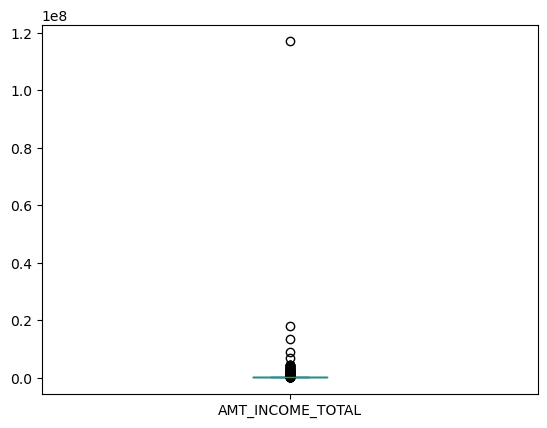

In [181]:
data["AMT_INCOME_TOTAL"].plot.box()
plt.show()

In [182]:
# Lets Drop these Records as it heavilty skewed the data

data=data[~(data["AMT_INCOME_TOTAL"]>5.175000e+05)]

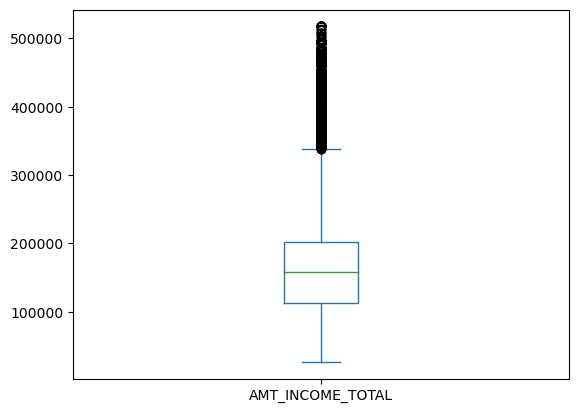

In [183]:
# checking box plot again

data["AMT_INCOME_TOTAL"].plot.box()
plt.show()

In [184]:
data["AMT_INCOME_TOTAL"].quantile([0.75,0.80,0.90,0.95,1])

0.75    202500.0
0.80    225000.0
0.90    270000.0
0.95    315000.0
1.00    517500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [185]:
income_bins=[0,25000,50000,100000,150000,200000,250000,300000,600000]
income_labels=["0-25,000","25,000-50,000","50,000-1,00,000","1,00,000-1,50,000","1,50,000-2,00,000","2,00,000-2,50,000","2,50,000-3,00,000","Above 300000"]

data["AMT_INCOME_Bins"]=pd.cut(data["AMT_INCOME_TOTAL"],bins=income_bins,labels=income_labels)

#### AMT_CREDIT

In [186]:
data["AMT_CREDIT"].describe()

count    2.496390e+05
mean     6.063418e+05
std      4.009757e+05
min      4.500000e+04
25%      2.762775e+05
50%      5.212800e+05
75%      8.156070e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

# Outlier Removal

<Axes: >

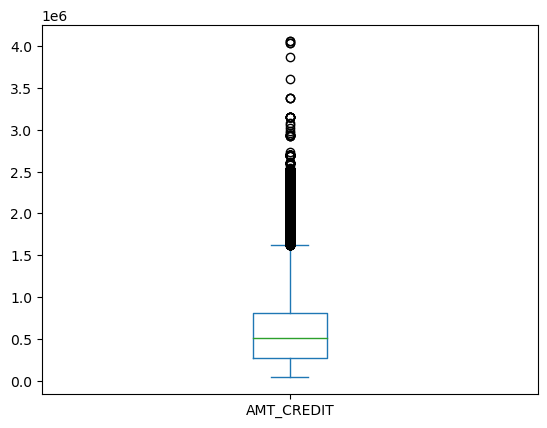

In [187]:
data["AMT_CREDIT"].plot.box()

In [188]:
data["AMT_CREDIT"].describe()

count    2.496390e+05
mean     6.063418e+05
std      4.009757e+05
min      4.500000e+04
25%      2.762775e+05
50%      5.212800e+05
75%      8.156070e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [189]:
# lets check quantile wise

data["AMT_CREDIT"].quantile([0.2,0.4,0.6,0.75,0.8,0.85,0.9,0.95,0.99,1])

# There is a huge difference between 0.99 and 1 quantile.Therefore,they are outliers and we have to remove these

0.20     256500.0
0.40     450000.0
0.60     622413.0
0.75     815607.0
0.80     900000.0
0.85    1035832.5
0.90    1149242.4
0.95    1350000.0
0.99    1822500.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [190]:
data=data[~(data["AMT_CREDIT"]>1822500)]

In [191]:
data["AMT_CREDIT"].quantile([0.1,0.15,0.2,0.4,0.6,0.8,0.9,0.95,0.99,1])

0.10     180000.0
0.15     225000.0
0.20     254700.0
0.40     444420.0
0.60     607500.0
0.80     900000.0
0.90    1125000.0
0.95    1305000.0
0.99    1660428.0
1.00    1822500.0
Name: AMT_CREDIT, dtype: float64

In [192]:
credit_bins=[0,50000,100000,200000,300000,400000,500000,600000,900000,1200000,1500000,2000000]
credit_labels=["0-50,000","50,000-1,00,000","1,00,000-2,00,000","2,00,000-3,00,000","3,00,000-4,00,000",
              "4,00,000-5,00,000","5,00,000-6,00,000","6,00,000-9,00,000","9,00,000-12,00,000","12,00,000-15,00,000",
              "Above 1500000+"]

data["AMT_CREDIT_Bins"]=pd.cut(data["AMT_INCOME_TOTAL"],bins=income_bins,labels=income_labels)

In [193]:
data["AMT_CREDIT_Bins"]=pd.cut(data["AMT_CREDIT"],bins=credit_bins,labels=credit_labels)

#### "AMT_ANNUITY"

<Axes: >

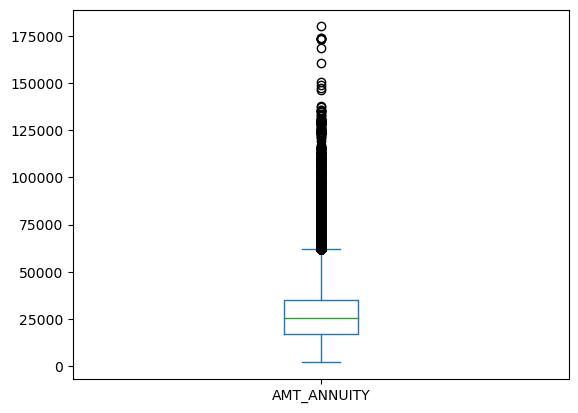

In [194]:
data["AMT_ANNUITY"].plot.box()

### Outlier Treatment

In [195]:
data["AMT_ANNUITY"].quantile([0.25,0.50,0.60,0.70,0.80,0.90,0.95,0.96,0.97,0.98,0.99,1])

# very huge diff between 0.99 to 1 quantile.Its an outlier and and we have have to remove it as right skewed our data and
# affecting our analysis

0.25     16875.0
0.50     25537.5
0.60     28602.0
0.70     32328.0
0.80     37602.0
0.90     45333.0
0.95     51948.0
0.96     53581.5
0.97     56290.5
0.98     60592.5
0.99     67500.0
1.00    180000.0
Name: AMT_ANNUITY, dtype: float64

In [196]:
# dropping the records where annuity amount>70000

data=data[~(data["AMT_ANNUITY"]>70000)]

<Axes: >

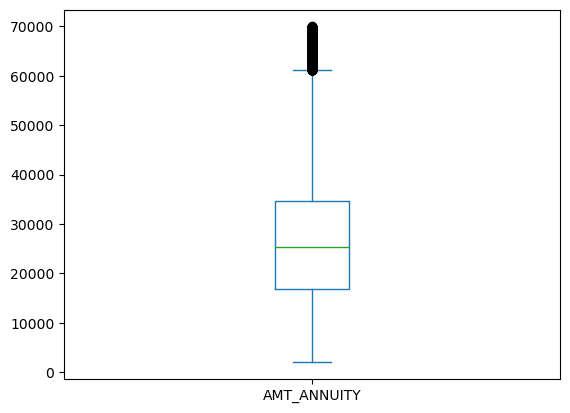

In [197]:
data["AMT_ANNUITY"].plot.box()            # now looks fine

In [198]:
data["AMT_ANNUITY"].quantile([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1])

0.05     9000.0
0.10    11250.0
0.15    13500.0
0.20    15061.5
0.25    16875.0
0.30    18760.5
0.35    20610.0
0.40    22050.0
0.50    25407.0
0.55    26640.0
0.60    28480.5
0.65    30366.0
0.70    32125.5
0.75    34587.0
0.80    37125.0
0.85    40221.0
0.90    44748.0
0.95    50940.0
1.00    69988.5
Name: AMT_ANNUITY, dtype: float64

In [199]:
annuity_bins=[0,10000,20000,30000,40000,50000,60000,700000]
annuity_labels=["0-10,000","10,000-20,000","20,000-30,000","30,000-40,000","40,000-50,000","50,000-60,000","Above 60,000"]
        

data["AMT_ANNUITY_Bins"]=pd.cut(data["AMT_ANNUITY"],bins=annuity_bins,labels=annuity_labels)

#### DAYS_BIRTH

In [200]:
data["DAYS_BIRTH"]=(data["DAYS_BIRTH"]/365).astype(int)

In [201]:
data["DAYS_BIRTH"]=data["DAYS_BIRTH"].abs()

In [202]:
data["DAYS_BIRTH_Bins"]=pd.cut(data["DAYS_BIRTH"],bins=[19,25,35,60,100],labels=["Very Young","Young","Middle Age","Senior_Citizen"])

In [203]:
# Again rechecked the data types and we found the following columns to change their data types.

data['NAME_CONTRACT_TYPE'] = data['NAME_CONTRACT_TYPE'].astype('category')
data['CODE_GENDER'] = data['CODE_GENDER'].astype('category')
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].astype('category')
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].astype('category')
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].astype('category')
data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].astype('category')
data['NAME_EDUCATION_TYPE'] = data['NAME_EDUCATION_TYPE'].astype('category')
data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].astype('category')
data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].astype('category')
data['WEEKDAY_APPR_PROCESS_START'] = data['WEEKDAY_APPR_PROCESS_START'].astype('category')
data['ORGANIZATION_TYPE'] = data['ORGANIZATION_TYPE'].astype('category')

# Checking for Imbalance Ratio

In [204]:
# having a look on "TARGET" column

data["TARGET"].value_counts()

0    223772
1     21508
Name: TARGET, dtype: int64

Here,
- 0 represents people who are non-defaulters
- 1 represents people who are  defaulters

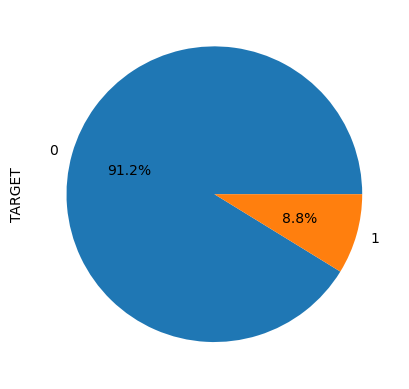

In [205]:
data["TARGET"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [206]:
### Checking for Imbalance ratio for the Target Column

total=len(data)
target_0=len(data[data["TARGET"]==0])
target_1=len(data[data["TARGET"]==1])



In [207]:
target_0=round(target_0/total*100,2)
target_0

91.23

In [208]:
target_1=round(target_1/total*100,2)
target_1

8.77

Clearly visible,we have a huge imbalance in the Data with a ratio of 8.66:91.34.We can do Undersampling and Oversampling to balance the Data

# Univariate Analysis

In [209]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_Bins,AMT_CREDIT_Bins,AMT_ANNUITY_Bins,DAYS_BIRTH_Bins
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,-637,-3648,-2120,1,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,0,0,0,0,0,1,"2,00,000-2,50,000","4,00,000-5,00,000","20,000-30,000",Very Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,-1188,-1186,-291,2,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510852,1,0,1,0,0,0,0,0,0,0,"2,50,000-3,00,000","12,00,000-15,00,000","30,000-40,000",Middle Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,-225,-4260,-2531,1,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,"50,000-1,00,000","1,00,000-2,00,000","0-10,000",Middle Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,-3039,-9833,-2437,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510852,2,0,2,0,0,0,0,0,0,0,"1,00,000-1,50,000","3,00,000-4,00,000","20,000-30,000",Middle Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,-3038,-4311,-3458,1,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510852,0,0,0,0,0,0,0,0,0,0,"1,00,000-1,50,000","5,00,000-6,00,000","20,000-30,000",Middle Age


#### "Target" column

TARGET: This column represents whether the loan was repaid on time (0,non-defaulters) or not (1,defaulters)

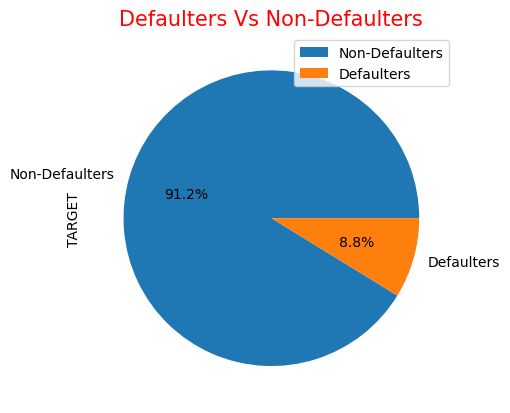

In [210]:
data["TARGET"].value_counts().plot.pie(autopct="%.1f%%",labels=["Non-Defaulters", "Defaulters"])
plt.title("Defaulters Vs Non-Defaulters",fontsize=15,color="Red")
plt.legend()
plt.show()

The analysis of the loan dataset reveals a notable class imbalance between defaulters and non-defaulters. Approximately 91.3% of the observations are categorized as "Non-Defaulters," while the remaining 8.7% fall under the label of "Defaulters."

#### "CODE_GENDER" column
Analyze the distribution of loan applicants by gender

In [211]:
data["CODE_GENDER"].value_counts()

F    153609
M     91671
Name: CODE_GENDER, dtype: int64

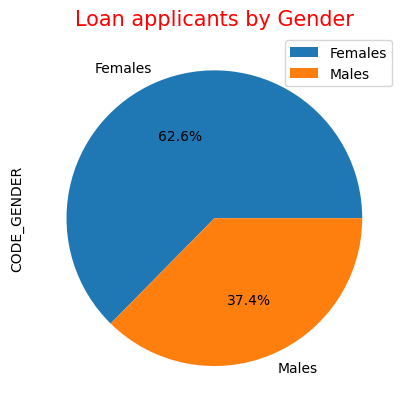

In [212]:
data["CODE_GENDER"].value_counts().plot.pie(autopct="%.1f%%",labels=["Females","Males"])
plt.title("Loan applicants by Gender",fontsize=15,color="Red")
plt.legend()
plt.show()


The data shows that more WOMEN than Men are applying for loans. The insight here maybe that women are increasingly taking control of their finances by actively seeking loans. This signals a shift towards greater financial independence and empowerment among women, which should be acknowledged and accommodated by financial institutions to better serve their needs.

#### "NAME_EDUCATION_TYPE" column
NAME_EDUCATION_TYPE: Explore the distribution of applicants based on their education level

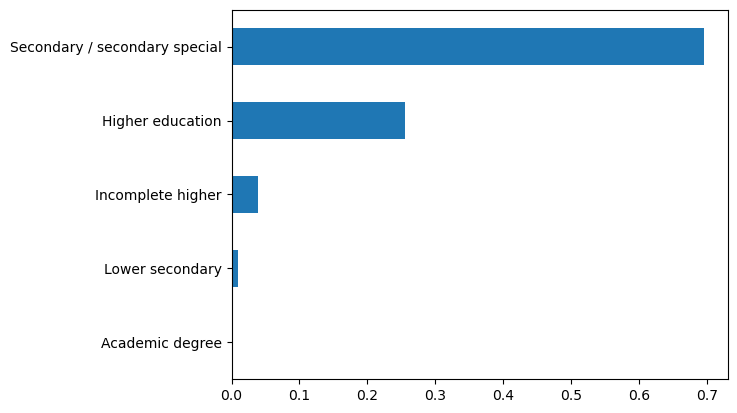

In [213]:
data["NAME_EDUCATION_TYPE"].value_counts(normalize=True).sort_values(ascending=False).plot.barh()
plt.gca().invert_yaxis()


The data shows that most loan applicants have completed secondary education, with some having higher education qualifications. However, academic degree holders are uncommon among loan applicants.

#### "AMT_INCOME_Bins" column: 
Analyze the distribution of income among loan applicants. 

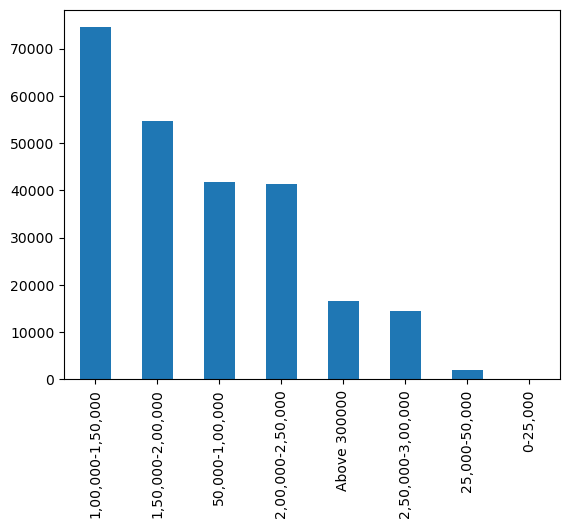

In [214]:
data["AMT_INCOME_Bins"].value_counts().plot.bar()
plt.show()


The majority of loan applicants earn moderate incomes, with the most applicants falling within the ₹100,000 to ₹200,000 range. Relatively fewer applicants have lower incomes below ₹50,000, while there is also a notable presence of applicants with higher incomes above ₹200,000, indicating diversity in income levels among loan seekers.

This suggests that individuals from various income backgrounds are seeking loans for different purposes. 

#### "AMT_CREDIT_Bins" column
 "AMT_CREDIT" represents the credit amount of the loan applied for by the loan applicant.

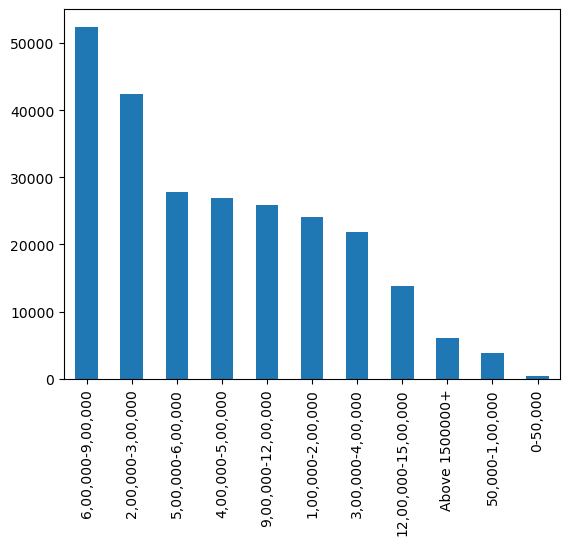

In [215]:
data["AMT_CREDIT_Bins"].value_counts().plot.bar()
plt.show()


The data shows that most people applying for loans are asking for moderate amounts, particularly in the range of ₹6,00,000 to ₹9,00,000. As the loan amounts increase, fewer people are applying for loans. However, there are still quite a few applicants seeking higher loan amounts, such as between ₹9,00,000 to ₹12,00,000 and ₹12,00,000 to ₹15,00,000. Fewer applicants are applying for smaller loan amounts below ₹1,00,000. Overall, the data highlights the diverse borrowing needs of loan applicants, ranging from moderate to higher loan amounts.

#### "AMT_ANNUITY_Bins" Column
Analysis of Loan Annuities among Individuals

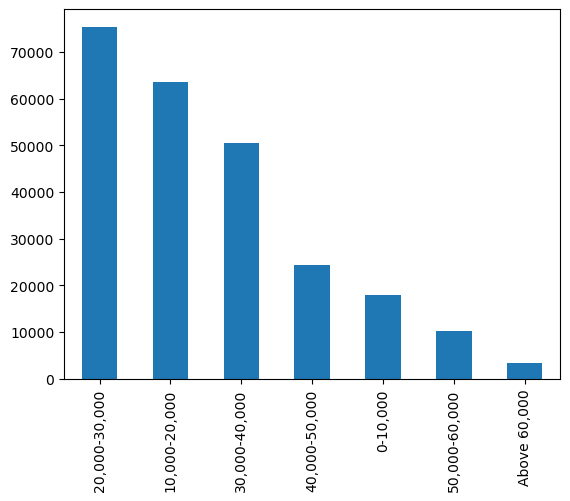

In [216]:
data["AMT_ANNUITY_Bins"].value_counts().plot.bar()
plt.show()

Most people prefer loans with moderate monthly payments generally between 10,000 to 40,000 because they can manage them comfortably. Loans with very high payments are less common, possibly because they're harder for people to afford or because they're more cautious about taking on too much debt.

#### "NAME_HOUSING_TYPE" column: 
Explore the distribution of housing types among loan applicants.

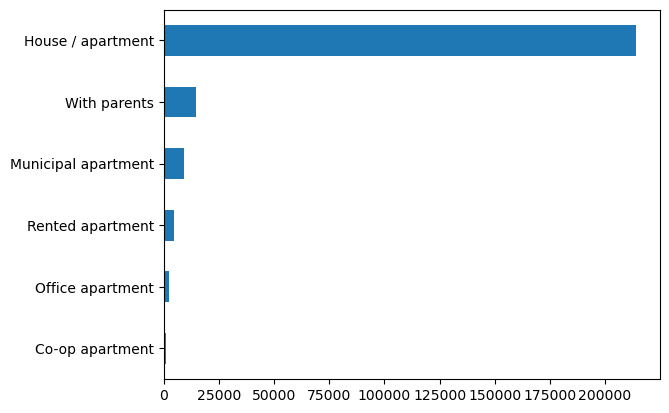

In [217]:
data["NAME_HOUSING_TYPE"].value_counts().sort_values().plot.barh()
plt.show()

This suggests that most applicants prefer to reside in their own homes or apartments, reflecting stability and ownership, while a smaller portion opt for alternative living arrangements such as living with parents or renting.

#### "NAME_FAMILY_STATUS" column:
Examine the marital status distribution among loan applicants

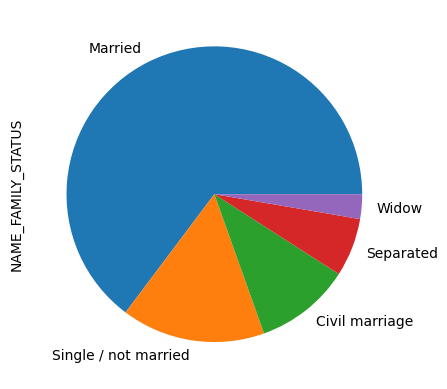

In [218]:
data["NAME_FAMILY_STATUS"].value_counts().plot.pie()
plt.show()

The distribution highlights the diverse marital statuses among loan applicants, reflecting the varied life stages and financial needs of individuals and families seeking financial assistance.

#### "ORGANIZATION_TYPE"
Exploring Top 10 Client Occupations in Loan Repayment Analysis

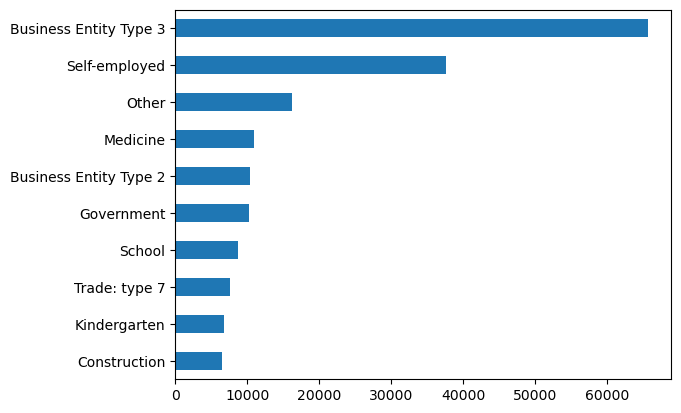

In [219]:
top_10 = data["ORGANIZATION_TYPE"].value_counts(ascending=False).head(10)
top_10.sort_values(ascending=True).plot.barh()
plt.show()

It shows  shows that people who run businesses or self employed are our best customers. Therefore, focusing our efforts on these segments may yield the highest returns as they often need financial services and are good at paying back what they owe.

#### "DAYS_BIRTH_Bins"
Analyse the distribution of different age groups

<Axes: ylabel='DAYS_BIRTH_Bins'>

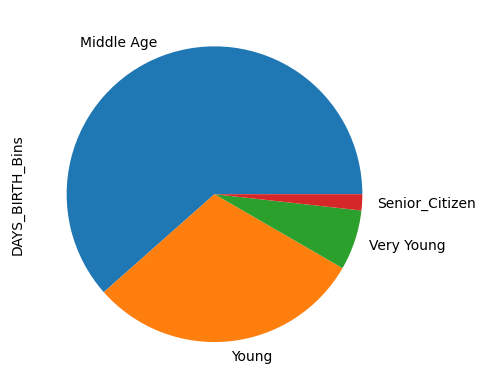

In [220]:
data["DAYS_BIRTH_Bins"].value_counts().plot.pie()

# Bivariate Analysis

##### TARGET vs. AMT_INCOME_TOTAL
Explore the relationship between income level and loan repayment status. 

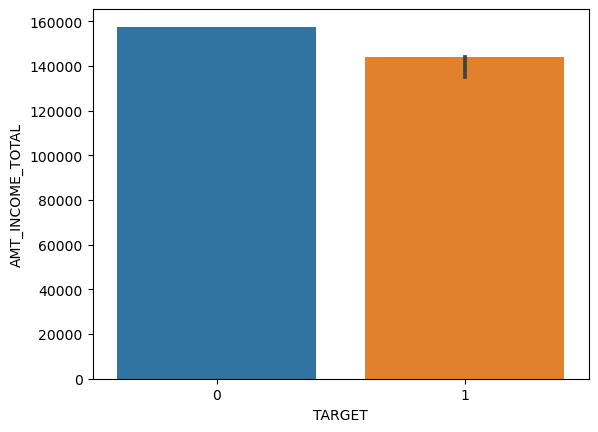

In [221]:
sns.barplot(x=data["TARGET"],y=data["AMT_INCOME_TOTAL"],estimator=np.median)
plt.show()

Income level has a small but important impact on whether you'll be able to repay a loan. If person earn more money, he is less likely to default on payments. Conversely, if he/she earn less, there's a higher chance they might struggle to repay your loans.

#### TARGET vs. NAME_EDUCATION_TYPE: 
Analyze how education level affects loan repayment

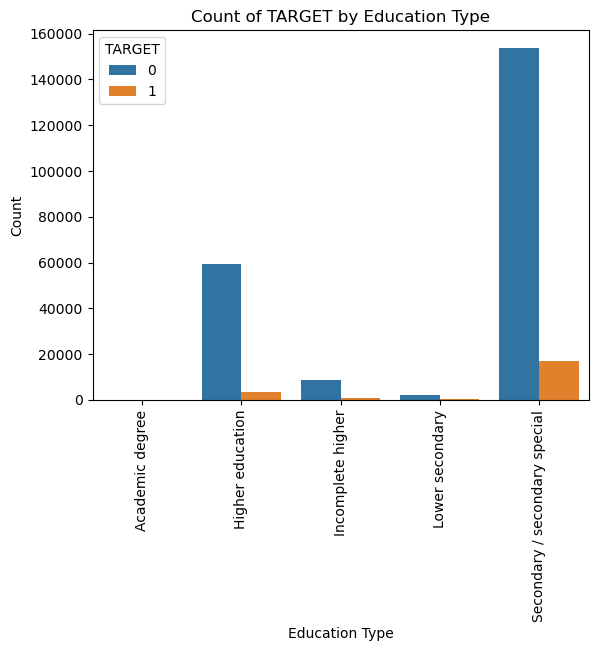

In [222]:
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=data)
plt.xticks(rotation=90)
plt.title('Count of TARGET by Education Type')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.show()

People who have completed both secondary and higher education are often the ones applying for loans. However, they're also finding it harder to pay back those loans, which means they're defaulting more frequently. This shows us that just because someone has a higher level of education doesn't always mean they're good at managing their money and paying off debts

#### TARGET vs. CODE_GENDER: 
Analyze if gender plays a role in loan repayment.

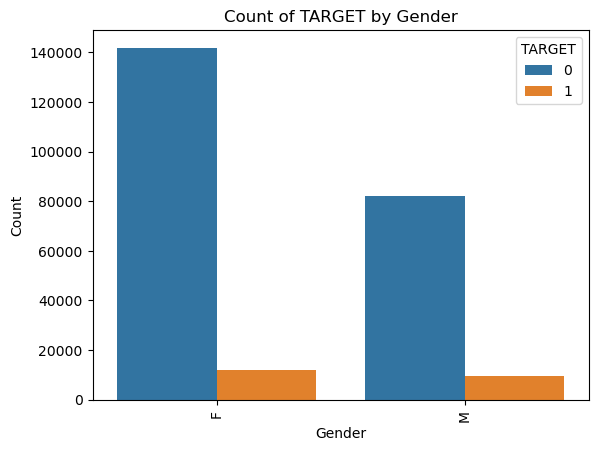

In [223]:
sns.countplot(x='CODE_GENDER', hue='TARGET', data=data)
plt.xticks(rotation=90)
plt.title('Count of TARGET by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Looking at the data, it seems that women have a slightly higher tendency to not repay their loans on time compared to men. This suggests there might be some differences in how men and women handle their loan repayments

#### TARGET vs. AMT_CREDIT: 
Examine how loan amount affects the likelihood of default.

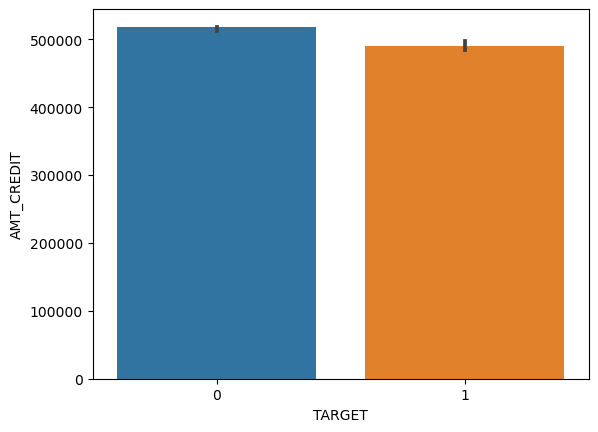

In [224]:
sns.barplot(x=data["TARGET"],y=data["AMT_CREDIT"],estimator=np.median)
plt.show()

The more money people borrow in loans, the slightly higher the chance they might struggle to pay it back. This could be because they've taken on too much debt, making it harder for them to pay back the money they borrowed.

##### TARGET vs. NAME_FAMILY_STATUS: 
Explore the impact of marital status on loan repayment

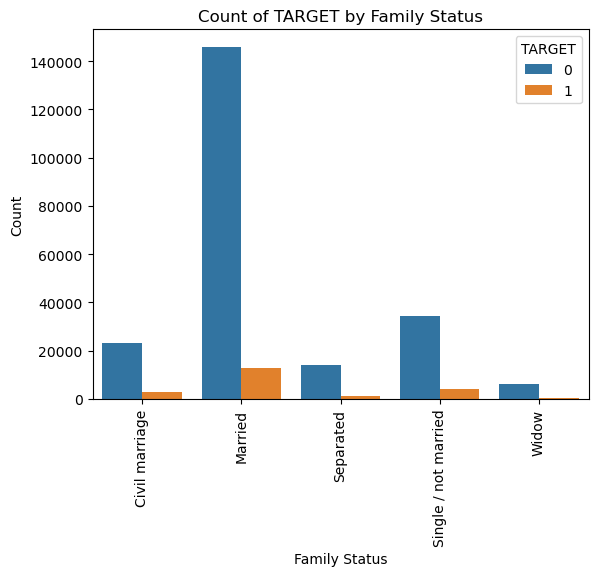

In [225]:
sns.countplot(x="NAME_FAMILY_STATUS",data=data,hue="TARGET")
plt.xticks(rotation=90)
plt.title('Count of TARGET by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.show()

Individuals who are married are statistically more likely to default on their financial obligations compared to those who are not married.

#### "Age_Bins" vs "TARGET"
Exploring how different age groups correlate with the likelihood of loan default.


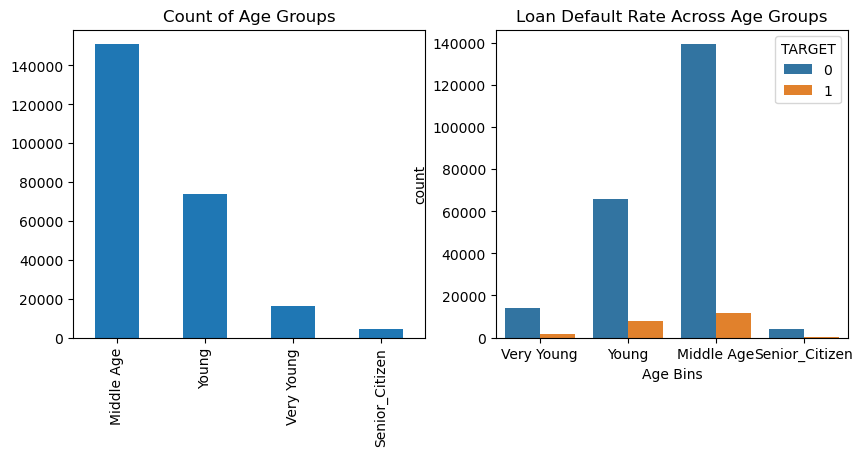

In [226]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
data["DAYS_BIRTH_Bins"].value_counts().plot.bar()
plt.title("Count of Age Groups")

plt.subplot(1,2,2)
sns.countplot(x="DAYS_BIRTH_Bins",data=data,hue="TARGET")
plt.title("Loan Default Rate Across Age Groups")
plt.xlabel("Age Bins")
plt.show()

People generally of middle age i.e between the ages of 30 and 60 are the ones who usually need loans. They're also good at paying them back, so it's safer to lend to them. Younger people also need loans, but they're more likely to have trouble paying them back, so it's riskier to lend to them.

#### "NAME_CONTRACT_TYPE" & "CODE_GENDER"
To explore the impact of marital status on loan repayment

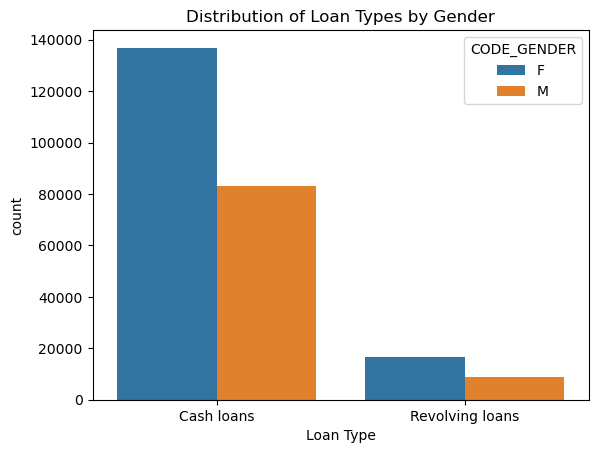

In [227]:
sns.countplot(x="NAME_CONTRACT_TYPE",data=data,hue="CODE_GENDER")
plt.title("Distribution of Loan Types by Gender")
plt.xlabel("Loan Type")
plt.show()

Most people, regardless of gender, prefer cash loans over revolving loans. Interestingly, females tend to take out the highest number of cash loans compared to males

#### "NAME_INCOME_TYPE" Vs "CODE_GENDER"
Analyzing the distribution of income types with respect to gender

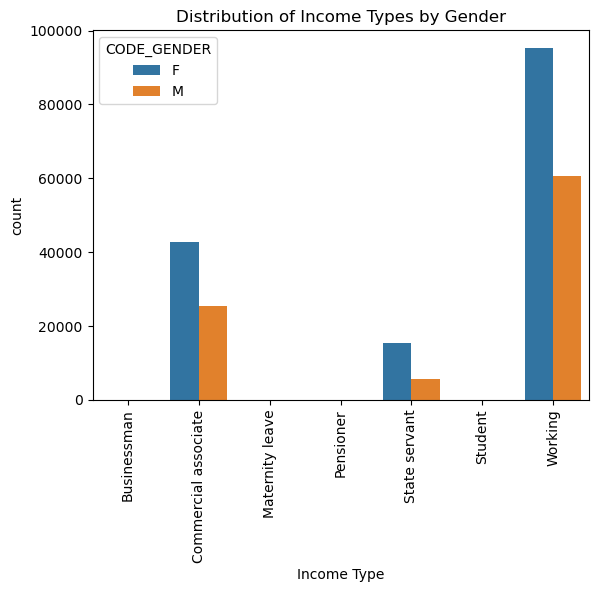

In [228]:
sns.countplot(x="NAME_INCOME_TYPE",data=data, hue="CODE_GENDER")
plt.xticks(rotation=90)
plt.xlabel("Income Type")
plt.title("Distribution of Income Types by Gender")
plt.show()


People who have taken loans are mostly employed, whether in working professions, commercial associates, or state services. Interestingly, most loan recipients are females, regardless of their job type

#### "NAME_TYPE_SUITE" Vs "TARGET"
Analysis of Accompaniment Types during Loan Application

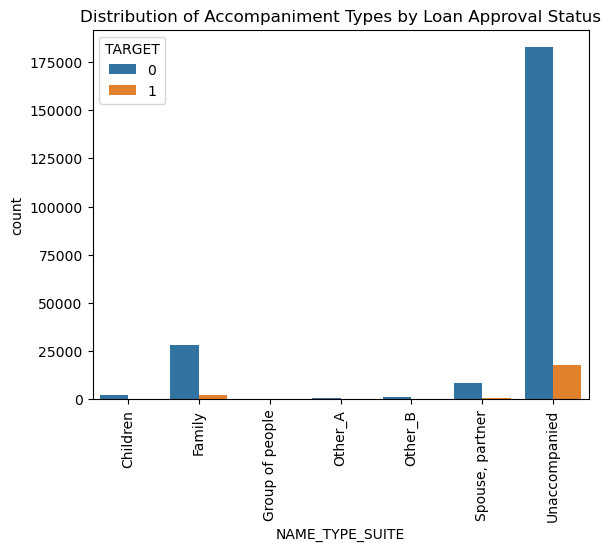

In [229]:
sns.countplot(x="NAME_TYPE_SUITE", hue='TARGET', data=data)
plt.title("Distribution of Accompaniment Types by Loan Approval Status")
plt.xticks(rotation=90)
plt.show()

Seems that majority of loan applicants prefer to apply for loans without accompanying family members, spouses, or children. This suggests a significant portion of applicants choose to handle their loan applications independently rather than involving others.This shows that they prefer to make their own decisions about money and handle the loan process alone. They might want to keep their finances private or feel more in control this way.

##### "AMT_CREDIT" Vs "AMT_ANNUITY"

Analysis of the Relationship between Loan Amount (AMT_CREDIT) and Loan Annuity (AMT_ANNUITY)

In [230]:
data["AMT_CREDIT"].corr(data["AMT_ANNUITY"])

0.7652869304000712

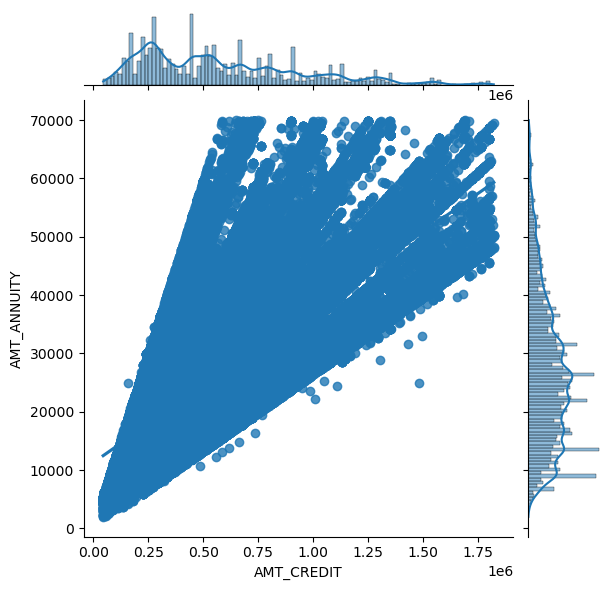

In [231]:
sns.jointplot(x="AMT_CREDIT",y="AMT_ANNUITY",data=data,kind="reg")
plt.show()

The strong positive relationship between Loan Amount (AMT_CREDIT) and Loan Annuity (AMT_ANNUITY) suggests that as the loan annuity increases, the loan amount also increases.

This insight implies that When people borrow more money (Loan Amount), they also agree to pay higher monthly installments (Loan Annuity). This means that if someone needs a bigger loan, they're okay with paying more each month to pay it back. 

#### "AMT_CREDIT" Vs "AMT_GOODS_PRICE"

Analysis of Relationship between Loan Amount (AMT_CREDIT) and Goods Price (AMT_GOODS_PRICE)

In [232]:
data["AMT_CREDIT"].corr(data['AMT_GOODS_PRICE'])

0.9838929548245099

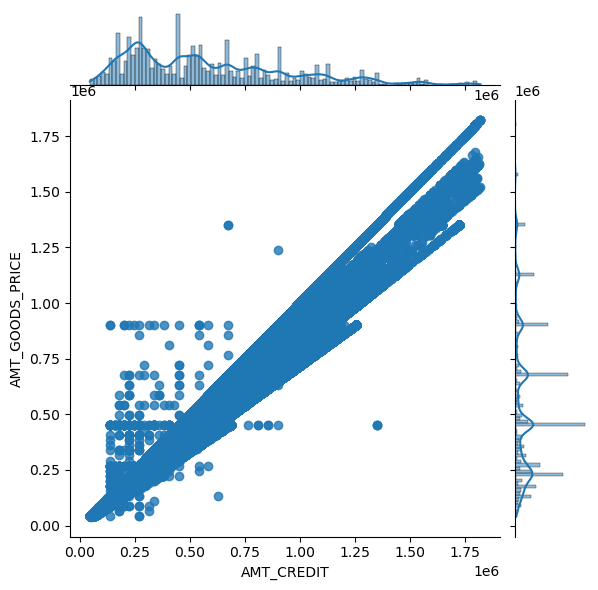

In [233]:
sns.jointplot(x="AMT_CREDIT",y='AMT_GOODS_PRICE',data=data,kind="reg")
plt.show()

There is a strong relationship between Loan amoun and credit Amount.
When people take out loans to buy things like cars or appliances, they usually borrow an amount of money (Loan Amount) that's close to the price of those things (Goods Price). This makes sense because borrowers want to make sure they have enough money to pay for what they're buying. So, the Loan Amount is often based on what the goods cost.

# Multivariate Analysis

#### Correlation Heatmap of Numeric Variables

Visualizing the correlation between different numeric variables in the dataset

In [234]:
numeric_variable=data[["TARGET", 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
                    'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','CNT_FAM_MEMBERS']]
corr_matrix=numeric_variable.corr()
corr_matrix

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS
TARGET,1.000000,-0.031346,-0.034478,-0.009136,-0.044976,-0.065681,0.074902,0.036772,0.039956,-0.001473
AMT_INCOME_TOTAL,-0.031346,1.000000,0.356085,0.428675,0.360333,0.056186,-0.035385,0.034660,-0.034042,-0.011681
AMT_CREDIT,-0.034478,0.356085,1.000000,0.765287,0.983893,0.159573,-0.091694,-0.023509,-0.037553,0.039080
AMT_ANNUITY,-0.009136,0.428675,0.765287,1.000000,0.763842,0.089520,-0.049223,0.006643,-0.025721,0.044270
AMT_GOODS_PRICE,-0.044976,0.360333,0.983893,0.763842,1.000000,0.154524,-0.094231,-0.020751,-0.039760,0.037082
DAYS_BIRTH,-0.065681,0.056186,0.159573,0.089520,0.154524,1.000000,-0.352029,-0.297259,-0.114539,-0.171874
DAYS_EMPLOYED,0.074902,-0.035385,-0.091694,-0.049223,-0.094231,-0.352029,1.000000,0.172905,0.090265,0.029348
DAYS_REGISTRATION,0.036772,0.034660,-0.023509,0.006643,-0.020751,-0.297259,0.172905,1.000000,0.032420,0.153659
DAYS_ID_PUBLISH,0.039956,-0.034042,-0.037553,-0.025721,-0.039760,-0.114539,0.090265,0.032420,1.000000,-0.108566
CNT_FAM_MEMBERS,-0.001473,-0.011681,0.039080,0.044270,0.037082,-0.171874,0.029348,0.153659,-0.108566,1.000000


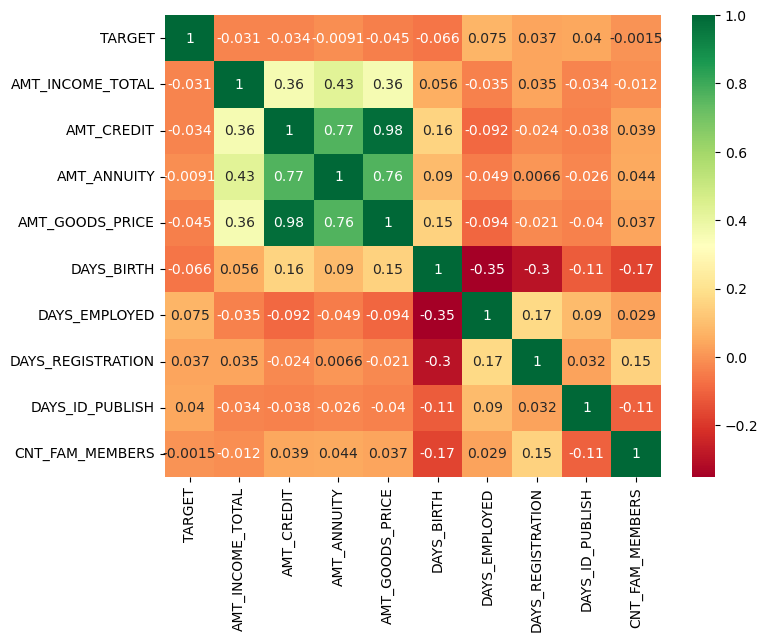

In [235]:
plt.figure(figsize=(8,6))

sns.heatmap(data=corr_matrix,annot=True,cmap="RdYlGn")
plt.show()

The strong relationships observed between the price of goods (AMT_GOODS_PRICE), the loan amount (AMT_CREDIT), and the monthly loan payment (AMT_ANNUITY) shows that when people borrow money to buy things, they usually borrow an amount that matches the price of what they're buying. If they're buying something expensive, they're okay with paying more each month to pay it back. So, the amount they borrow and the monthly payments they agree to are often based on the price of the item they're buying.






#### "CODE_GENDER" Vs "NAME_EDUCATION_TYPE" Vs "TARGET":
Examine how gender and education level together influence loan repayment. 

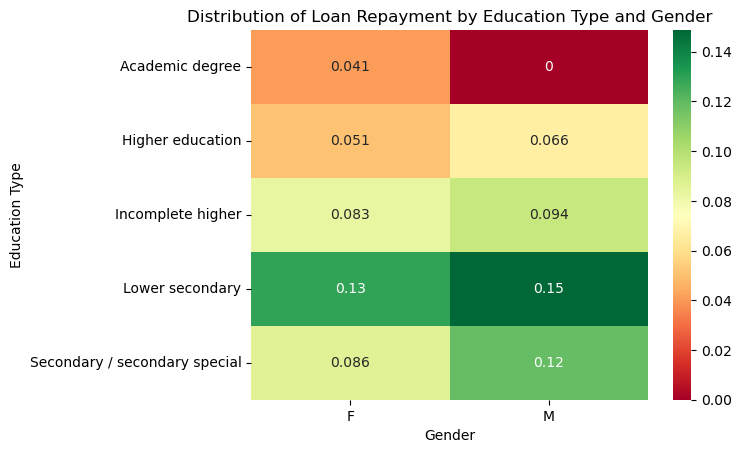

In [236]:
pivot_matrix=data.pivot_table(index="NAME_EDUCATION_TYPE",columns="CODE_GENDER",values="TARGET")
sns.heatmap(pivot_matrix,annot=True,cmap="RdYlGn")
plt.title('Distribution of Loan Repayment by Education Type and Gender')
plt.xlabel('Gender')
plt.ylabel('Education Type')
plt.show()

Having a basic education works well for both men and women when it comes to paying back loans, but it's particularly effective for men


#### "NAME_FAMILY_STATUS" Vs "NAME_HOUSING_TYPE" Vs  "TARGET"
Explore the combined impact of marital status and housing type on loan repayment

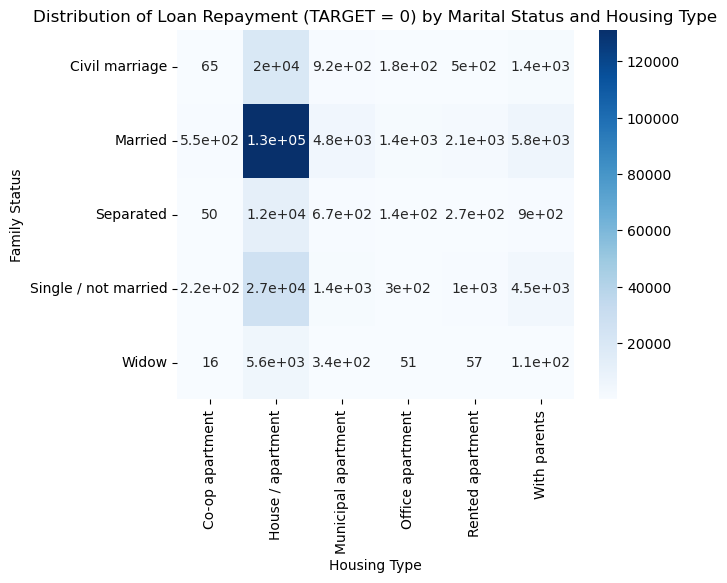

In [237]:
filtered_data = data[data['TARGET'] == 0]
pivot_matrix=filtered_data.pivot_table(index="NAME_FAMILY_STATUS",columns="NAME_HOUSING_TYPE",values="TARGET",aggfunc="count")
sns.heatmap(pivot_matrix,annot=True,cmap="Blues")
plt.title('Distribution of Loan Repayment (TARGET = 0) by Marital Status and Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Family Status')
plt.show()

It gives us a insight that married people who own or rent houses or apartments are really good at repaying their loans on time. This is because they tend to have stable finances, they either own their home or have a stable place to live, and they often have supportive partners helping them out. So, their strong repayment behavior comes from their stable finances, having a stable place to live, and having supportive relationships.

#### "AMT_CREDIT_Bins" Vs 'DAYS_BIRTH_Bins'
Analyzing the Impact of Different Age Groups on Credit Amounts

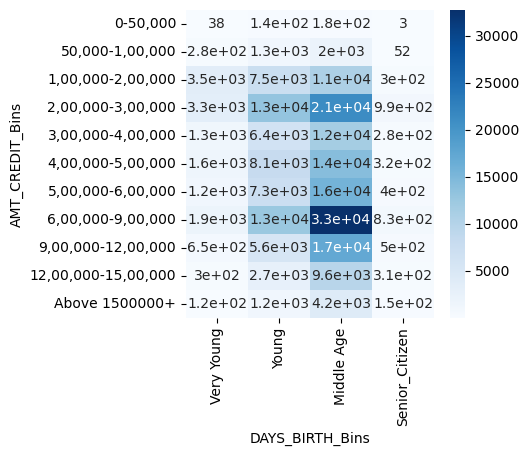

In [238]:
plt.figure(figsize=(4,4))
filtered_data = data[data['TARGET'] == 0]
matrix=filtered_data.pivot_table(index='AMT_CREDIT_Bins',columns='DAYS_BIRTH_Bins',values="TARGET",aggfunc="count")
sns.heatmap(matrix,annot=True,cmap="Blues")
plt.show()

- Middle-aged individuals tend to borrow higher amounts, with the maximum loan amounts falling in the range of 6 to 9 lakhs.
- Middle-aged individuals are the most active applicants for credit loans, indicating a higher demand for credit products among this demographic group.





#  Key Findings:

#### Data Imbalance: 
     -  Significantly more non-defaulters than defaulters (91.3% vs. 8.7%).
#### Demographics:
     -  More women applying for loans, indicating increased financial independence.
     -  Most applicants have completed secondary education, with few having degrees.
     -  Diverse income levels with most earning ₹1,00,000-₹2,00,000.
#### Loan Characteristics:
      - Most loans are moderate amounts (₹6,00,000-₹9,00,000) with moderate monthly payments (Between ₹10,000-₹40,000).
      - Most prefer to live in their own homes/apartments.
      - Diverse marital statuses reflect varied life stages and needs.
      
#### Potential High-Return Segments:
      - Self-employed individuals have good repayment records.
      - Higher income earners are less likely to default.
      
##### Potential Risk Factors:
      - Higher education doesn't always translate to good money management.
      - Women may have slightly higher default rates than men.
      - Larger loan amounts and younger borrowers pose higher risk.
      - Married individuals may be more likely to default.
#### Loan Preferences:
      - Most prefer cash loans and independent loan applications.
      - Loan amount and monthly payment are positively correlated.
      - Loan amount is often linked to the cost of purchased goods.
      
#### Good Repayment Behavior:
       - Basic education is beneficial for loan repayment, especially for men.
       - Married homeowners/renters have strong repayment records.  
       - Middle-aged individuals with moderate loan amounts repay well.
       




# Actionable Insights:


- Target marketing towards self-employed individuals and higher income earners.
- Consider education level alongside other factors for risk assessment.
- Monitor potential risk factors like larger loan amounts, younger borrowers, and married individuals.
- Offer diverse loan options like cash loans and independent applications.
- Leverage the positive correlations between loan amount, monthly payment, and goods price for strategic pricing.
- Support married homeowners/renters and middle-aged borrowers with moderate loan amounts.